In [3]:
# Inspect the initial structure of the dataset
print("Initial DataFrame:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

# Print actual column names to find mismatches
print("Columns in DataFrame:")
print(df.columns)

# Standardize column names (strip whitespace)
df.columns = df.columns.str.strip()

# Select relevant columns (Ensure correct names)
relevant_columns = ['DAILY_STRESS', 'AGE', 'GENDER', 'INCOME', 'SLEEP_HOURS']  # Define expected column names
df = df[[col for col in relevant_columns if col in df.columns]]

# Standardize the age category
df['AGE'] = df['AGE'].replace({'Less than 20': '20 or less'})

# Convert 'DAILY_STRESS' and 'SLEEP_HOURS' to numeric, coercing errors
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce')
df['SLEEP_HOURS'] = pd.to_numeric(df['SLEEP_HOURS'], errors='coerce')

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handle missing values - drop rows with key variables missing
df.dropna(subset=['DAILY_STRESS', 'AGE', 'GENDER', 'INCOME', 'SLEEP_HOURS'], inplace=True)

# Generate descriptive statistics
descriptive_summary = df.describe(include='all')
print("\nDescriptive summary of the cleaned data:")
print(descriptive_summary)

# Save the cleaned dataset
df.to_csv('cleaned_work_life_balance.csv', index=False)
print("\nData cleaning complete. Cleaned data saved to 'cleaned_work_life_balance.csv'.")


Initial DataFrame:


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'  # Adjust the path as needed
data = pd.read_csv(file_path)

# Overview of the dataset
data_info = data.info()
data_head = data.head()
data_descriptive = data.describe(include='all')

# Checking for missing values
missing_values = data.isnull().sum()

# Data types
data_types = data.dtypes

# Correlation matrix
correlation = data.corr()

# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(x='stroke', data=data)
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Histograms for age and bmi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots for Age and BMI by Stroke
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

(data_info, data_head, data_descriptive, missing_values, data_types, correlation)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_STRESS  389 non-null    float64
 1   AGE           390 non-null    object 
 2   GENDER        390 non-null    object 
 3   SLEEP_HOURS   390 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ KB


ValueError: could not convert string to float: '36 to 50'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'  # Adjust the path as needed
data = pd.read_csv(file_path)

# Overview of the dataset
data_info = data.info()
data_head = data.head()
data_descriptive = data.describe(include='all')

# Checking for missing values
missing_values = data.isnull().sum()

# Data types
data_types = data.dtypes

# Check for non-numeric columns before correlation
print("Non-numeric columns before conversion:\n", data_types[data_types != 'float64'])

# Optional: Convert categorical variables to numeric if necessary
# Example: Assuming 'age_group' is a categorical string column
# Uncomment and adjust the following line if you have a specific categorical column to convert
# le = LabelEncoder()
# data['age_group_numeric'] = le.fit_transform(data['age_group'])

# Filter out non-numeric data for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Include only numeric columns

# Recheck for missing values after filtering
missing_values_numeric = numeric_data.isnull().sum()
print("Missing values in numeric data:\n", missing_values_numeric)

# Correlation matrix
correlation = numeric_data.corr()

# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(x='stroke', data=data)
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Histograms for age and bmi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots for Age and BMI by Stroke
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

(data_info, data_head, data_descriptive, missing_values, data_types, correlation)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_STRESS  389 non-null    float64
 1   AGE           390 non-null    object 
 2   GENDER        390 non-null    object 
 3   SLEEP_HOURS   390 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ KB
Non-numeric columns before conversion:
 AGE            object
GENDER         object
SLEEP_HOURS     int64
dtype: object
Missing values in numeric data:
 DAILY_STRESS    1
SLEEP_HOURS     0
dtype: int64


ValueError: Could not interpret value `stroke` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'  # Adjust the path as needed
data = pd.read_csv(file_path)

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Visualizations
plt.figure(figsize=(12, 6))

# Make sure 'stroke' or its correct alternative is used
sns.countplot(x='stroke', data=data)  # Change 'stroke' to the correct column name if needed
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


Columns in the dataset: Index(['DAILY_STRESS', 'AGE', 'GENDER', 'SLEEP_HOURS'], dtype='object')


ValueError: Could not interpret value `stroke` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_STRESS  389 non-null    float64
 1   AGE           390 non-null    object 
 2   GENDER        390 non-null    object 
 3   SLEEP_HOURS   390 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ KB


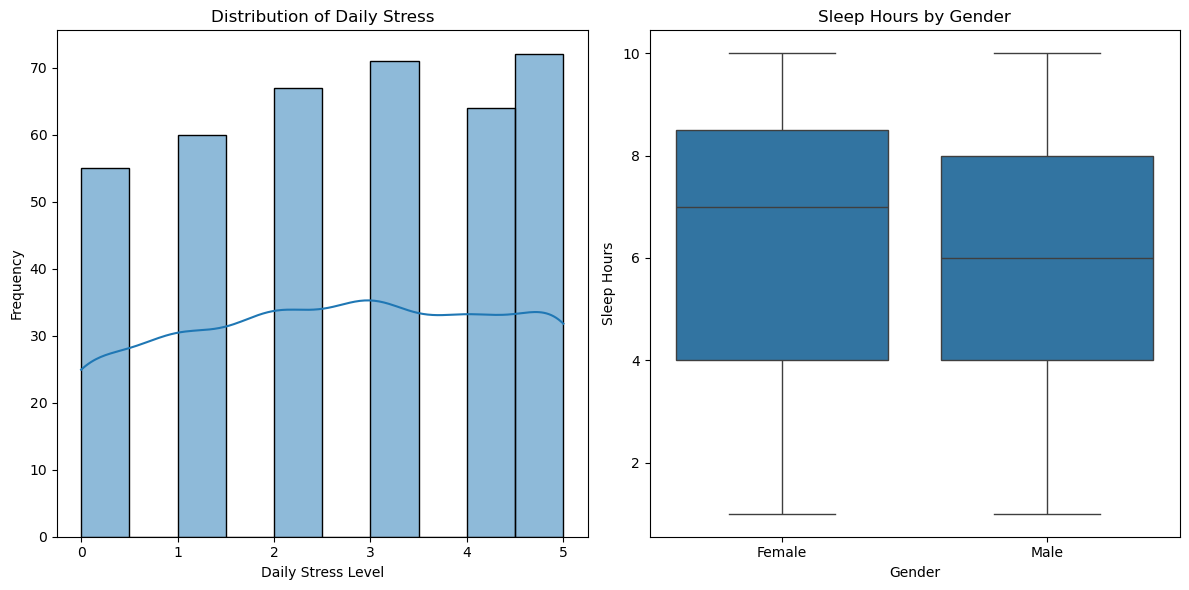

ValueError: could not convert string to float: '36 to 50'

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd

# Load the uploaded file
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary_stats = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Visualizations
plt.figure(figsize=(12, 6))

# Distribution of DAILY_STRESS
plt.subplot(1, 2, 1)
sns.histplot(data['DAILY_STRESS'], bins=10, kde=True)
plt.title('Distribution of Daily Stress')
plt.xlabel('Daily Stress Level')
plt.ylabel('Frequency')

# Boxplot of SLEEP_HOURS by GENDER
plt.subplot(1, 2, 2)
sns.boxplot(x='GENDER', y='SLEEP_HOURS', data=data)
plt.title('Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Count plot for AGE and GENDER
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE', hue='GENDER', data=data)
plt.title('Count of Gender by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


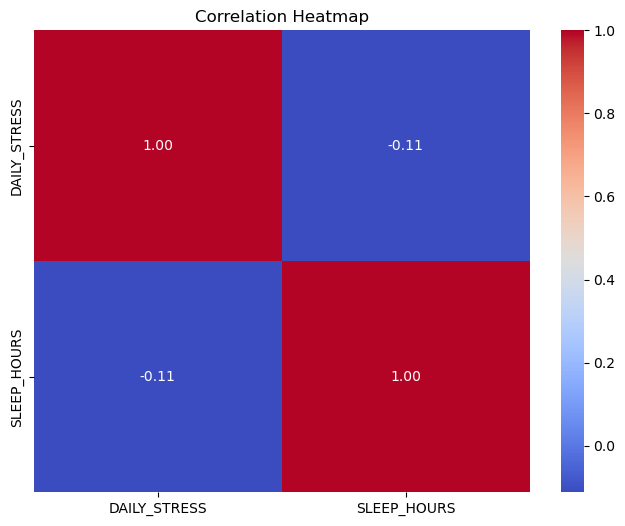

In [ ]:
# Select numeric columns only for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


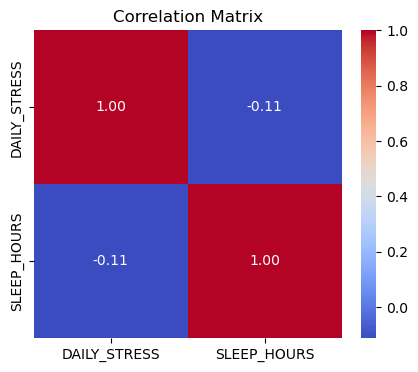

,DAILY_STRESS,SLEEP_HOURS
DAILY_STRESS,1.000000,-0.112066
SLEEP_HOURS,-0.112066,1.000000


In [ ]:
# Calculating the correlation only for numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix values
correlation_matrix
